# Проект "Анализ маркетинговых данных клиентов банка"

Суть задания - подобрать базу данных не менее 100 пунктов и обязательно на тему маркетинга и маркетплейсов
Описать ее
Провести базовые манипуляции с данными
Создать новые переменные
Определит совокупность и выборку (частные таблицы и распределения)
Описательные статистики (меры центральной тенденции и разброса)
Z-оценка (выбросы)
Корреляция
Визуализация данных
Продвинутая визуализация даннах
Тестирование гипотез (непараметрические критерии)
Параметрические критерии для тестирования гипотез
Линейная регрессия
Логистическая регрессия



Оценивается способность ориентироваться в документации Python и дополнять работу новыми инструментами анализа данных.

Весь текст оформляется строго в ячейках типа markdown.
На каждом этапе анализа необходимо обосновывать выбор того или иного метода исследования (шага), приводить пояснение и выводить содержательный вывод методом форматирования.
Выводы подкрепляются смысловым описанием.
Аналитическая часть подкрепляется иллюстративным материалом используются варианты продвинутой визуализации + интерактивные графики.
Учитывается аккуратность кода – отсутствуют ошибки, код структурирован и оформлен в едином стиле, даются пояснения и комментарии р

## Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, IntSlider
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, f1_score, roc_auc_score, roc_curve, make_scorer

## Описание датасета

Этот набор данных содержит различные сведения о банковских клиентах, такие как их семейное положение, неплатежи по кредиту, их возраст, работа, образование и т. д. Этот набор данных представляет собой набор банковских маркетинговых данных для клиента.

**Столбцы:**

age - возраст
job - род занятий  
marital - семейное положение  
education - уровень образования  
default - eсть ли у клиента неоплаченный кредит    
housing - есть ли у клиента ипотека  
loan - есть ли потребительский кредит  
contact - тип номера телефона  
month - месяц последнего рекламного звонка  
day_of_week - день недели последнего рекламного звонка  
duration - длительность последнего рекламного звонка (сек)  
campaign - количество звонков клиенту во время этой маркетинговой кампании  
pdays - число дней прошедших с момента контакта с этим клиентом во время предыдущей кампании (999 - не участвовал в предыдушей кампании    
previous - количество звонков клиенту во время предыдущей кампании  
poutcome - результат предыдущей маркетинговой кампании для этого клиента  
emp.var.rate - коэффициент изменения занятости - квартальный индикатор  
euribor3m - 3 месячная процентная ставка - дневной показатель  
cons.price.idx - индекс потребительских цен - месячный индикатор  
cons.conf.idx - индекс доверия потребителей - месячный индикатор  
nr.employed - количество работников - квартальный показатель  
y - открыл ли клиент срочный вклад после кампании?  



## Загрузка датасета

In [2]:
df = pd.read_csv("bankmarketing.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Предварительная обработка и анализ данных (EDA)

### Дубликаты строк

In [4]:
df.duplicated().sum()

12

Очистим датасет от дубликатов

In [5]:
df=df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

### Явные пропуски

In [6]:
df.isna().sum(axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Явных пропусков не обнаружено.

### Обработка и анализ отдельных столбцов

#### Возраст

Относится к абсолютной шкале признаков. Построим гистограмму и график с усами, используя интерактивные визуализации.

In [7]:
def duration_hist(max_age, bins):
    fig, ax = plt.subplots(1, 1,figsize=(15,10));
    ax.set_xlabel("Возраст (лет)");
    ax.set_ylabel("Число клиентов");
    ax.set_title(f'Возраст <= {max_age}');
    df.query("age <= @max_age").age.hist(bins=bins,
                                           ax=ax, 
                                           figsize=(15,10));
num_bins = IntSlider(min = 10, max = 20, step = 1, value = 15)
max_age = IntSlider(min = 20, max = 100, step = 5, value = 100)
interact(duration_hist, max_age=max_age, bins=num_bins);

interactive(children=(IntSlider(value=100, description='max_age', min=20, step=5), IntSlider(value=15, descrip…

Описательная статистика

In [8]:
df.age.describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Коиенты банка по-возрасту распределены в интевале \[17, 98\] лет. Средний возраст - 40, медианный 38. 

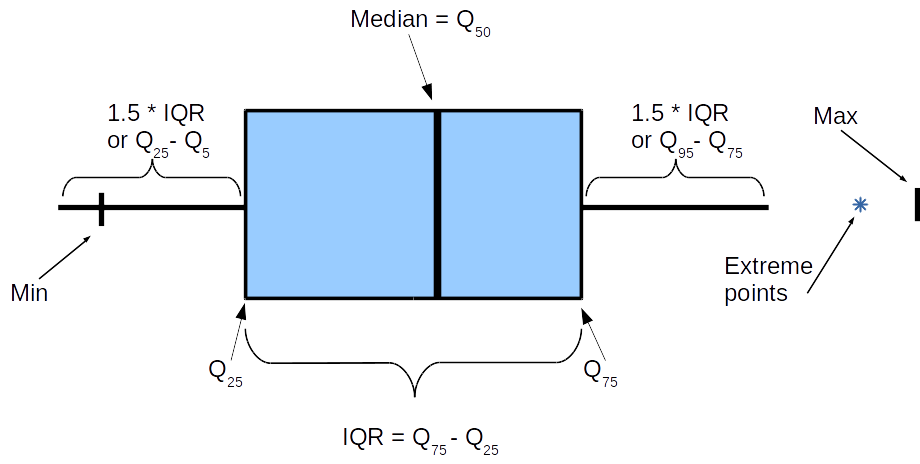

In [9]:
def lim_boxplot(max_age):
    fig, ax = plt.subplots(1, 1, figsize = (10, 10));
    df.boxplot(fontsize=16, ax=ax, column=["age"], figsize=(10, 10));
    ax.set_ylim(None, max_age);
    ax.set_title(f'Возраст <= {max_age}');
end = IntSlider(min = 50, max = 100, step = 5, value = 100)
interact(lim_boxplot, max_age=end);

interactive(children=(IntSlider(value=100, description='max_age', min=50, step=5), Output()), _dom_classes=('w…

Выбросы начинаются после 70-лет согласно бокс-плоту. Однако это не является аномалиями. 

#### Сфера деятельности

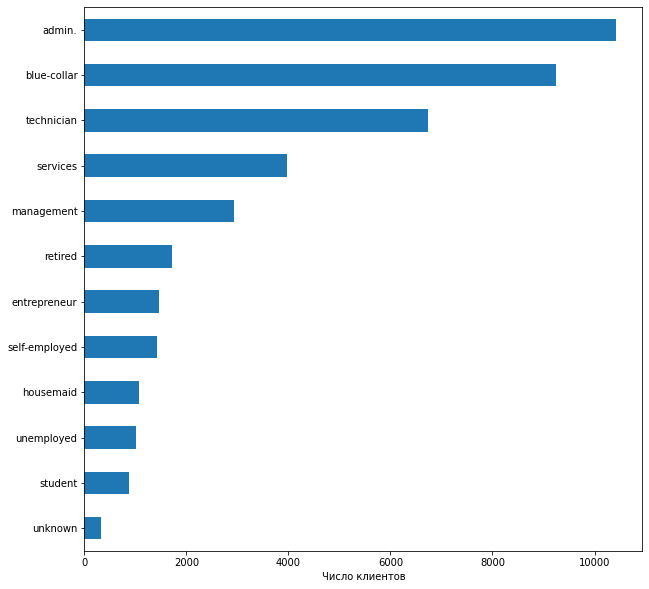

In [10]:
df.job.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10), xlabel="Число клиентов");

Категориальный номинальный признак. Больше всего среди клиентов финансовой организации управленческого персонала и рабочих (голубые воротники),меньше всего студентов. Так же есть неявные пропуски, но их мало и можно их оставить.

#### Семейное положение

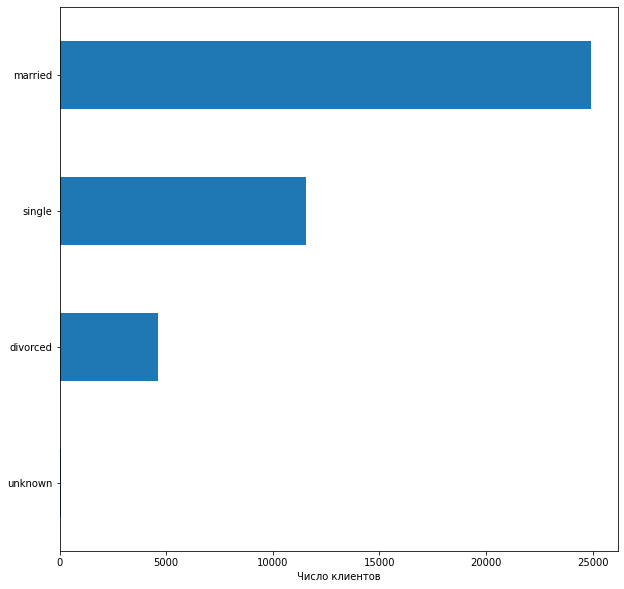

In [11]:
df.marital.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10), xlabel="Число клиентов");

Категориальный номинальный признак. Больше всего среди клиентов финансовой организации женатых (замужних). Так же есть неявные пропуски, но их мало и можно их оставить.

#### Уровень образования

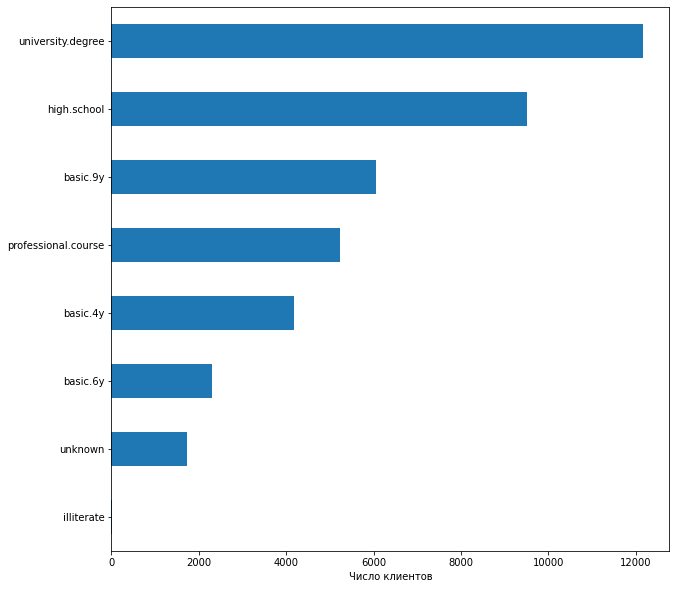

In [12]:
df.education.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10), xlabel="Число клиентов");

Категориальный признак. Больше всего среди клиентов финансовой организации выпускников университета. Так же есть неявные пропуски. Признак относится к порядковой шкале. Создадим новую переменную ed_level.

In [13]:
ed_dict = {'basic.4y':1, 'high.school':4, 'basic.6y':2, 'basic.9y':3,
       'professional.course':5, 'unknown':0, 'university.degree':6,
       'illiterate':0}
df["ed_level"] = df.education.apply(lambda x: ed_dict[x])

Для новой переменной мы можем определить медиану и перцентили без учета пропусков. (Но среднее и дисперсия для порядковой шкалы смысла не имеет).

In [14]:
print(f'Медиана: {df.ed_level.median()}\nP(25%): {df.ed_level.quantile(0.25)}\nP(75%): {df.ed_level.quantile(0.75)}')

Медиана: 4.0
P(25%): 3.0
P(75%): 6.0


#### Есть ли у клиента неоплаченный кредит

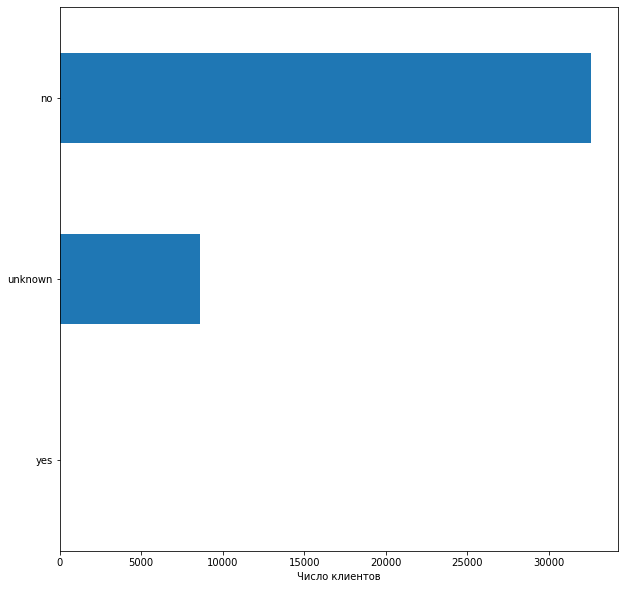

In [15]:
df.default.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10), xlabel="Число клиентов");

Ощутимо преобладают клиенты без невыплаченных кредитов. Если бы не ощутимо большое количество неявных пропусков можно было бы представить переменную как бинарную. Пропуски пока оставляем, но этот столбец скорее всего не будет участвовать в построении модели из за пропусков и дисбаланса положительных и отрицательных ответов.

#### Есть ли ипотека?

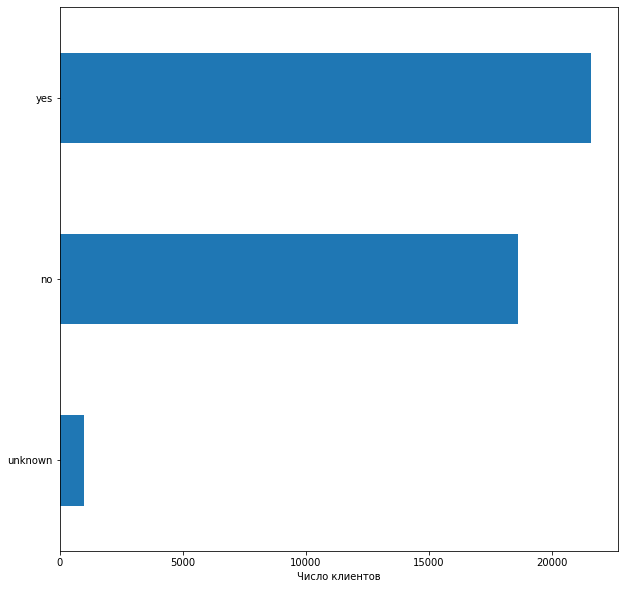

In [16]:
df.housing.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10), xlabel="Число клиентов");

Бинарная категориальная переменная. Можем заменить на 0 и 1. Так же можем пока использовать pd.NA для пометки неявных пропусков. 

In [17]:
df['housing'] = df['housing'].apply(lambda x: {"yes":1, "no":0, "unknown":pd.NA}[x])

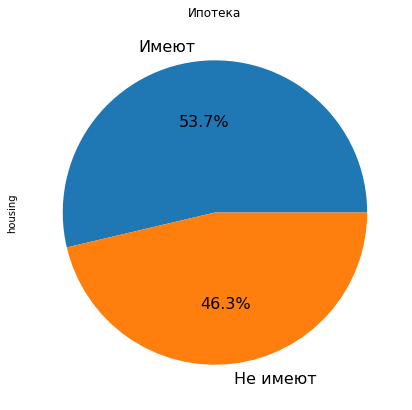

In [18]:
df.housing.value_counts().rename(index={1:"Имеют", 0:"Не имеют"}).plot(kind='pie', 
                                            title="Ипотека",
                                            fontsize=16,
                                            legend=False,
                                            autopct='%1.1f%%',
                                            figsize=(7,7));

Чуть больше клиентов с ипотекой.

#### Есть ли потребительский кредит?
Бинарная категориальная переменная поступаем, как с предыдущей.

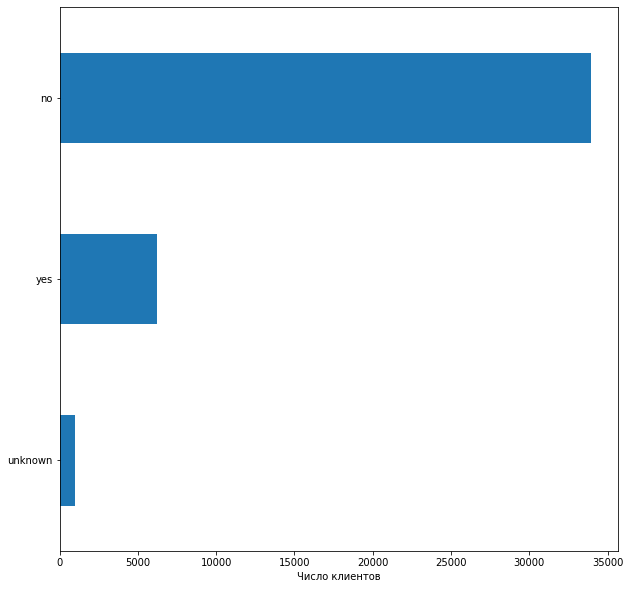

In [19]:
df.loan.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,10), xlabel="Число клиентов");

In [20]:
df['loan'] = df['loan'].apply(lambda x: {"yes":1, "no":0, "unknown":pd.NA}[x])

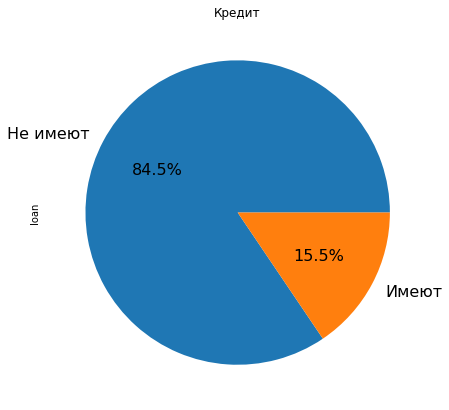

In [21]:
df.loan.value_counts().rename(index={1:"Имеют", 0:"Не имеют"}).plot(kind='pie', 
                                            title="Кредит",
                                            fontsize=16,
                                            legend=False,
                                            autopct='%1.1f%%',
                                            figsize=(7,7));

Большинство не имеют (пока :-)) потребительского кредита.

#### Тип контактного номера

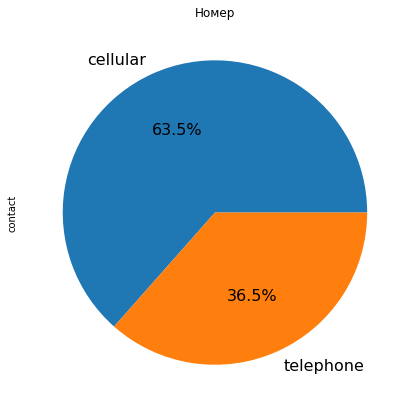

In [22]:
df.contact.value_counts().plot(kind='pie', title="Номер", fontsize=16, legend=False, autopct='%1.1f%%',figsize=(7,7));

Большинство пользуются сотовой связью.

#### Месяц последнего рекламного звонка

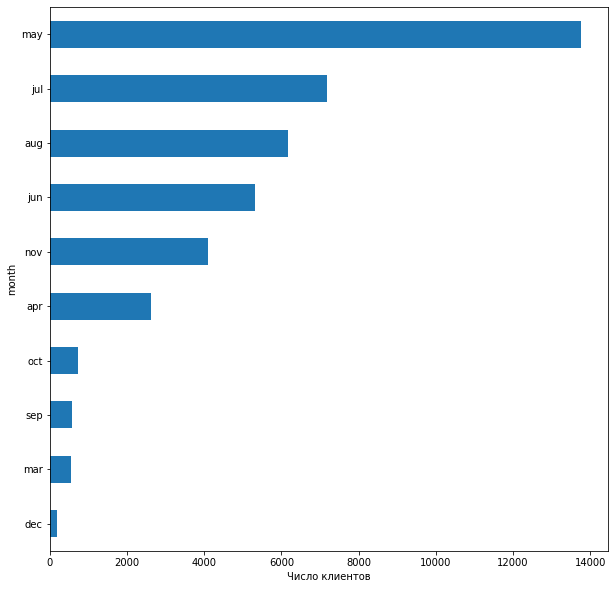

In [23]:
df.groupby("month").month.count().sort_values(ascending=True).plot.barh(figsize=(10,10), xlabel="Число клиентов");

Больше всего в мае, меньше всего в декабре. Создадим дополнитеьную переменну номер месяца.

In [24]:
number_m = {'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4, 'sep':9}
df["month_number"] = df.month.apply(lambda x: number_m[x])

#### День недели последнего рекламного звонка

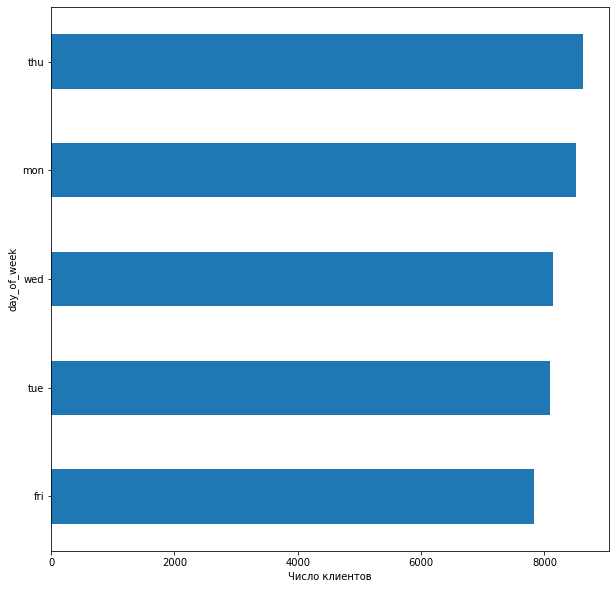

In [25]:
df.groupby("day_of_week").day_of_week.count().sort_values(ascending=True).plot.barh(figsize=(10,10), xlabel="Число клиентов");

Примерно равное количество звонков в будние дни, в выходные организация не звонят (видимо запрещено законодательно). Для будушего машинного обучения создадим переменную day_w_n.

In [26]:
number_d = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df["day_w_n"] = df.day_of_week.apply(lambda x: number_d[x])

#### Длительность последнего звонка (сек)  

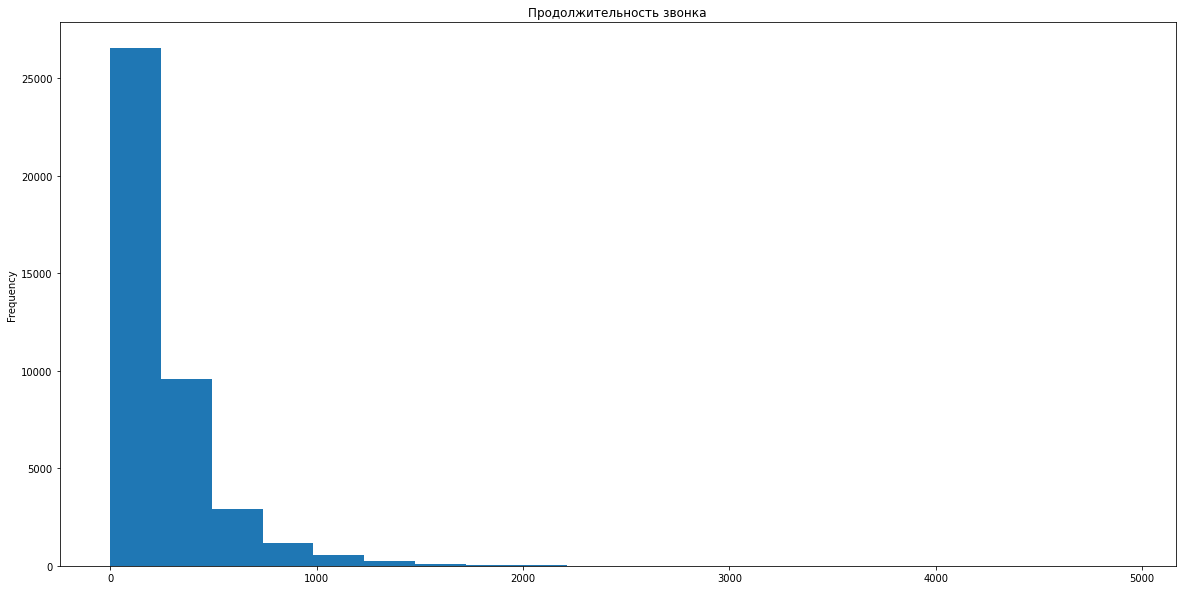

In [27]:
df['duration'].plot.hist(bins=20, figsize=(20, 10), title='Продолжительность звонка');

Распределение напоминает распределение Пуассона. Как было указано составителем датасета этот параметр следует выкинуть из признаков для модели предсказывающей отклик (столбец y), не смотря на высокую с ним корреляцию.

Описательная статистика.

In [28]:
df.duration.describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Интересно что можно обсуждать с банком в течении полутора часов за одни звонок (!).

Выбросы точно есть, проверим, много ли их.

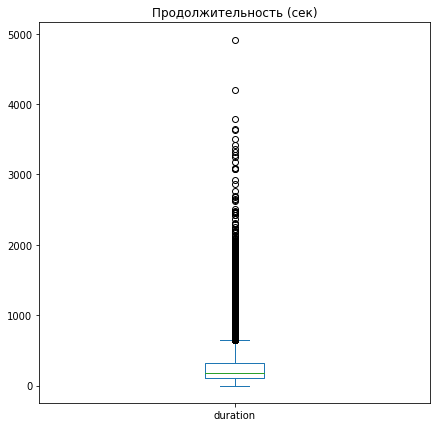

In [29]:
df.duration.plot.box(figsize=(7, 7), title='Продолжительность (сек)');

Проверим по z-мере.

In [30]:
abs_z = np.abs(st.zscore(df.duration))
df[abs_z > 3].duration.count()

861

Немного. Можно далее удалить для построение моделей. Можно построить гистограмму по очищенным даннм.

In [31]:
def dur_hist(bins):
    fig, ax = plt.subplots(1, 1,figsize=(15,10));
    ax.set_xlabel("Продожительность звонка (мин)");
    ax.set_ylabel("Count");
    ax.set_title('Продожительность звонка');
    df[abs_z <= 3].duration.hist(bins=bins,
                                           ax=ax, 
                                           figsize=(15,10));
num_bins = IntSlider(min = 5, max = 20, step = 1, value = 10)
interact(dur_hist, bins=num_bins);

interactive(children=(IntSlider(value=10, description='bins', max=20, min=5), Output()), _dom_classes=('widget…

Наблюдаем визуально распределение Пуассона.

#### Количество звонков клиенту во время этой маркетинговой кампании
Числовая переменная строим гистограмму и оцениваем выбросы по бокс-плоту.

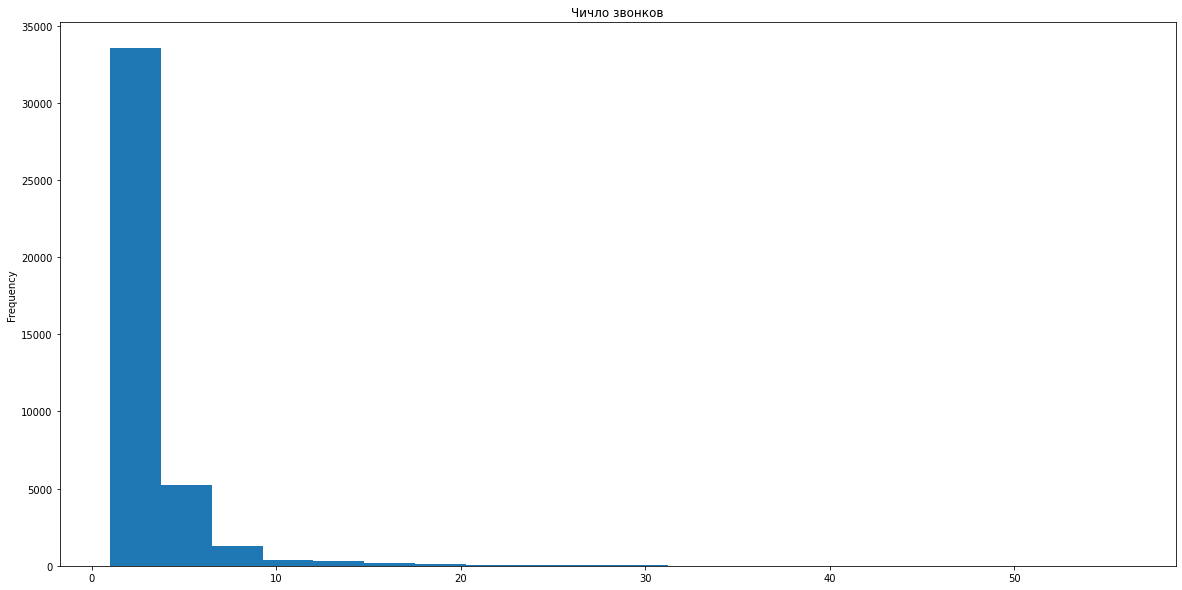

In [32]:
df['campaign'].plot.hist(bins=20, figsize=(20, 10), title='Чичло звонков');

In [33]:
df.campaign.describe()

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

56 звонков за одну кампанию - цифра просто страшная.

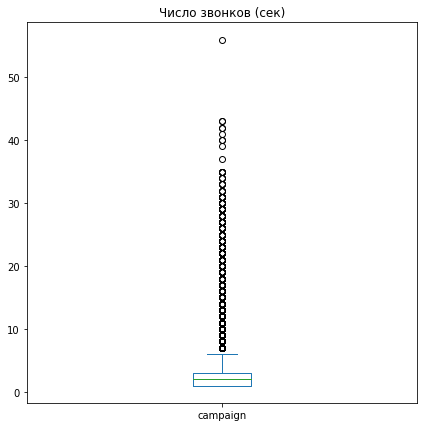

In [34]:
df.campaign.plot.box(figsize=(7, 7), title='Число звонков (сек)');

In [35]:
abs_z = np.abs(st.zscore(df.campaign))
df[abs_z > 3].campaign.count()

869

Примерно столько же сколько по длительности. Интересно есть ли связь.

In [36]:
def calls_hist(bins):
    fig, ax = plt.subplots(1, 1,figsize=(15,10));
    ax.set_xlabel("Количество зваонков в текущей кампании");
    ax.set_ylabel("Count");
    ax.set_title('Число звонков');
    df[abs_z <= 3].campaign.hist(bins=bins,
                                           ax=ax, 
                                           figsize=(15,10));
num_bins = IntSlider(min = 5, max = 20, step = 1, value = 10)
interact(calls_hist, bins=num_bins);

interactive(children=(IntSlider(value=10, description='bins', max=20, min=5), Output()), _dom_classes=('widget…

Визуально экспоненциальное распределение.

#### Число дней прошедших с момента контакта с этим клиентом во время предыдущей кампании

Для анализа во-первых удалим индикаторное значение 999 и визуализируем гистограмму.

In [37]:
def pday_hist(bins):
    fig, ax = plt.subplots(1, 1,figsize=(15,10));
    ax.set_ylabel("Count");
    ax.set_title('Число дней');
    df.query("pdays < 999").pdays.hist(bins=bins,
                                ax=ax, 
                                figsize=(15,10));
num_bins = IntSlider(min = 5, max = 20, step = 1, value = 10)
interact(pday_hist, bins=num_bins);

interactive(children=(IntSlider(value=10, description='bins', max=20, min=5), Output()), _dom_classes=('widget…

Какие у них, однако, частые кампании. Для оценки числа новых участников создадим бинарную переменную и визуализируем круговую диаграмму.

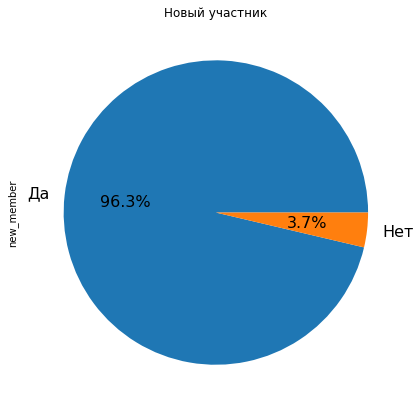

In [38]:
df["new_member"] = df.pdays.apply(lambda x: 1 if x==999 else 0)
df['new_member'].value_counts().rename(index={1:"Да", 0:"Нет"}).plot(kind='pie', 
                                            title="Новый участник",
                                            fontsize=16,
                                            legend=False,
                                            autopct='%1.1f%%',
                                            figsize=(7,7));

Подавляющее большинство клиентов не участвовало в предыдущей кампании.

#### Количество звонков клиенту во время предыдущей кампании

Логично что для анализа надо дополнительно фильтровать не новых участников.

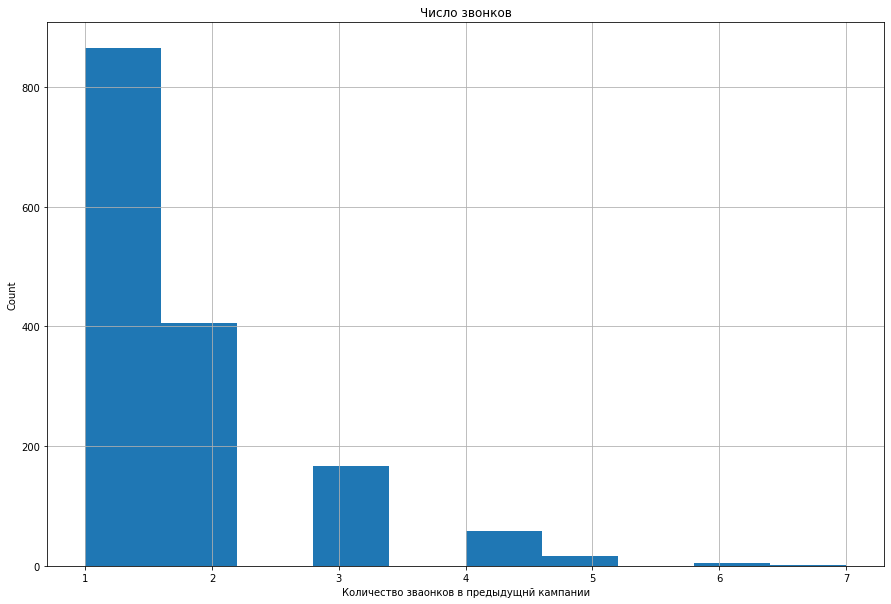

In [39]:
fig, ax = plt.subplots(1, 1,figsize=(15,10));
ax.set_xlabel("Количество зваонков в предыдущнй кампании");
ax.set_ylabel("Count");
ax.set_title('Число звонков');
df.query("new_member==0").previous.hist(bins=10,
                                           ax=ax, 
                                           figsize=(15,10));

Прошлая кампания для старых участников была менее интеснивная.

#### Результат предыдущей маркетинговой кампании для этого клиента

Тоже фильтруем данные только по клиентам которые в ней участвовали.

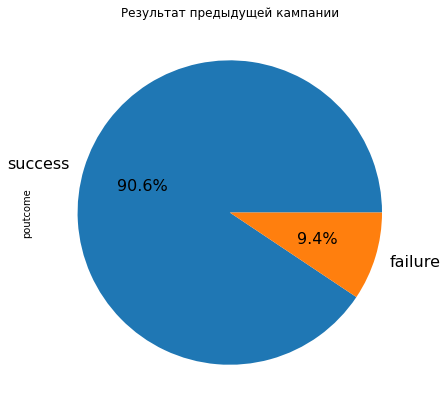

In [40]:
df.query("new_member==0").poutcome.value_counts().plot(kind='pie', 
                                            title="Результат предыдущей кампании",
                                            fontsize=16,
                                            legend=False,
                                            autopct='%1.1f%%',
                                            figsize=(7,7));

Показатель бинарный. В целом для прошлой кампании показатели отличные.

##### Финансовые показатели

Построим на однои графике гистограммы для финансовых и социальных показателей.

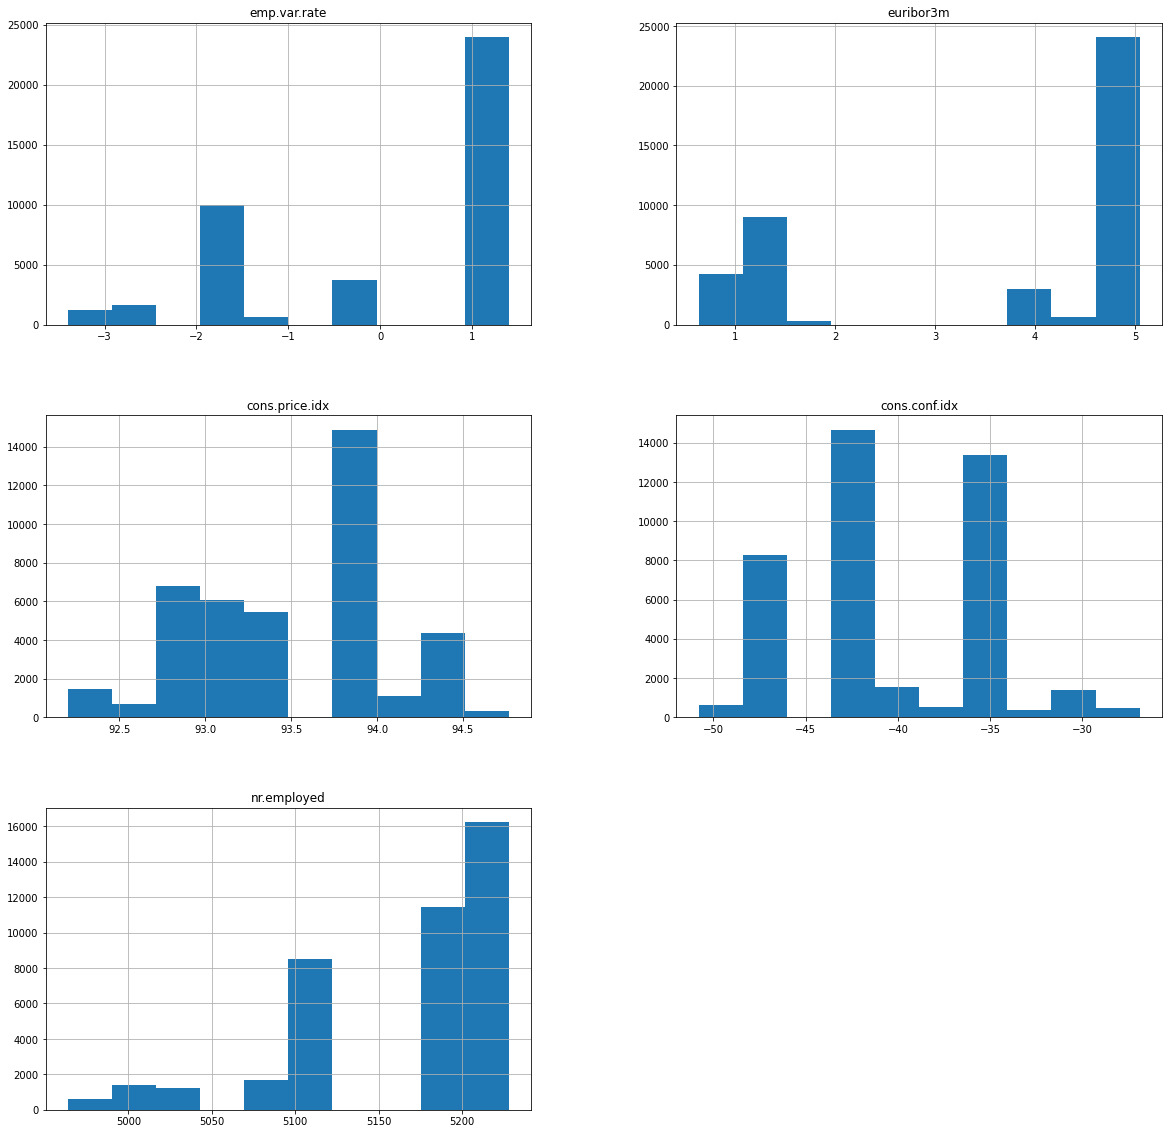

In [41]:
df[['emp.var.rate', 'euribor3m', 'cons.price.idx',  'cons.conf.idx', 'nr.employed']].hist(bins=10, figsize=(20, 20));

Ясно что показатели повторяются для клиентов, поэтому такие странные распределения, то есть фактически переменные крайне дискретны. О выбросах говорить бессмысленно.

##### Открыл ли клиент срочный вклад после текущей кампании
Целевая переменая для бинарной классификации. Посмотрим на баланс классов.

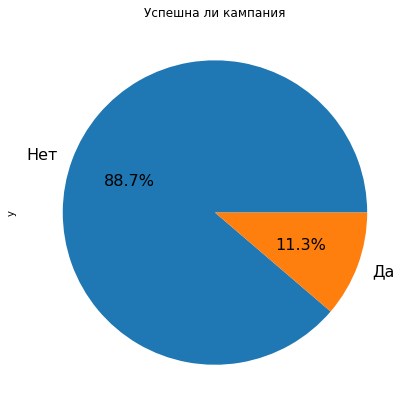

In [42]:
df['y'] = df.y.apply(lambda x: 1 if x=='yes' else 0)
df['y'].value_counts().rename(index={1:"Да", 0:"Нет"}).plot(kind='pie', 
                                            title="Успешна ли кампания",
                                            fontsize=16,
                                            legend=False,
                                            autopct='%1.1f%%',
                                            figsize=(7,7));

Дисбаланс классов налицо, кроме того, что то эффективность этой кампании низкая

### Корреляции

#### Матрица корреляций для некатегориальных переменных

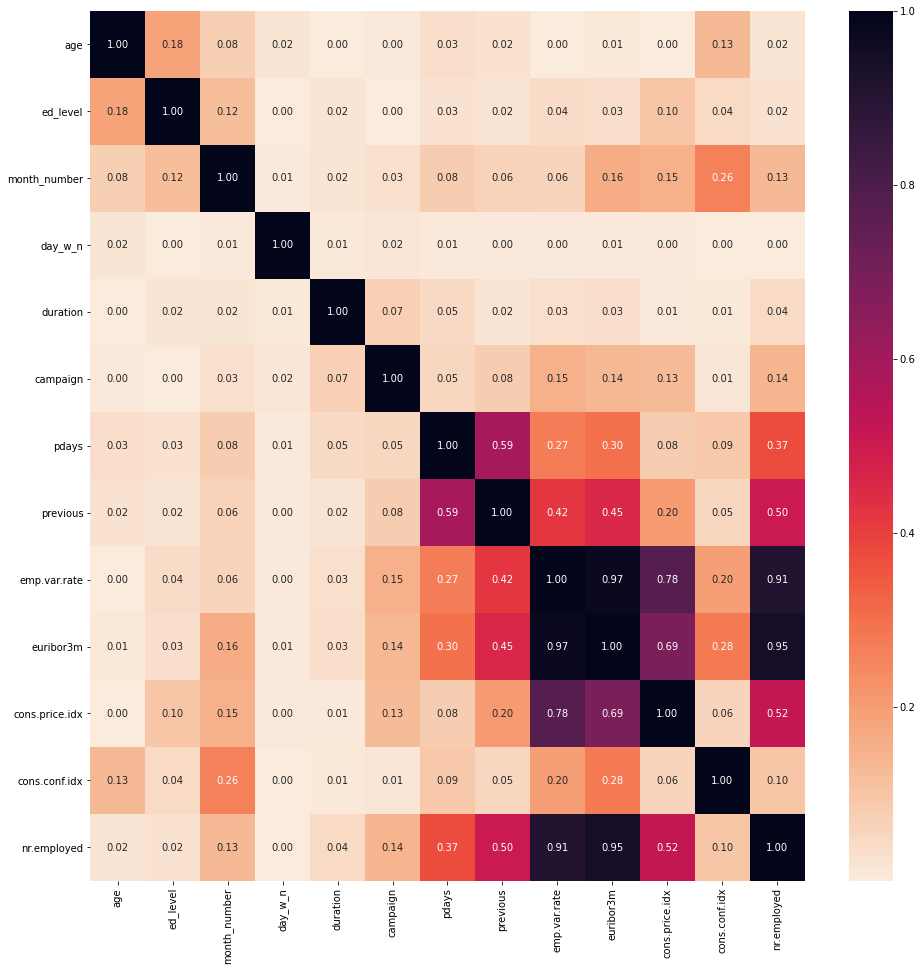

In [43]:
num_features = ['age', "ed_level",
                "month_number", "day_w_n", 'duration', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'euribor3m', 'cons.price.idx',  'cons.conf.idx', 'nr.employed']
plt.figure(figsize = (16,16))
sns.heatmap(abs(df[num_features].corr()), annot=True, fmt=".2f", cmap="rocket_r");

Наибольшие корреляции наблюдаются между экономическими показателями. Есть даже варианты почти полной мультиколинеарности. Что плохо для линейной регрессии без регуляризации.
Оценим несколько экономических показателей вместе по матрице графиков рассеяния.

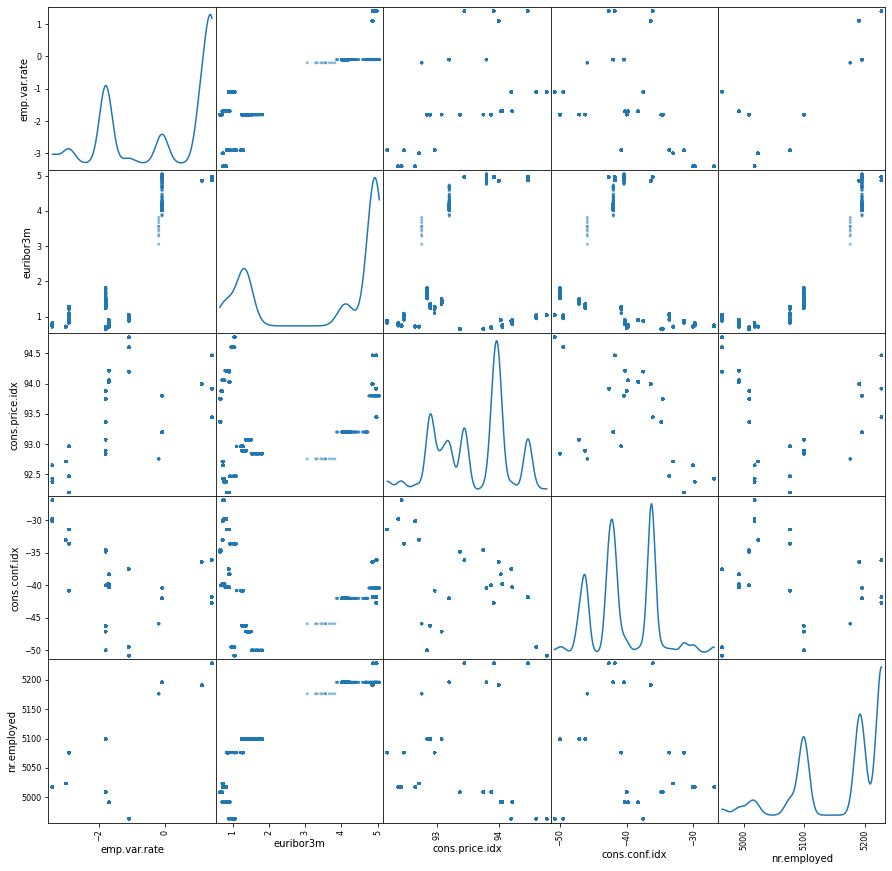

In [44]:
economic = df[['emp.var.rate', 'euribor3m', 'cons.price.idx',  'cons.conf.idx', 'nr.employed']]
pd.plotting.scatter_matrix(economic, diagonal="kde", figsize=(15, 15));

Сильная прямая связь есть между количеством работников с одной стороны и 3-х месячной % ставкой, коэффициентом изменения занятости с другой. Рассмотрим значимые корреляции других параметров. 

#### Возраст vs. Уровень образования

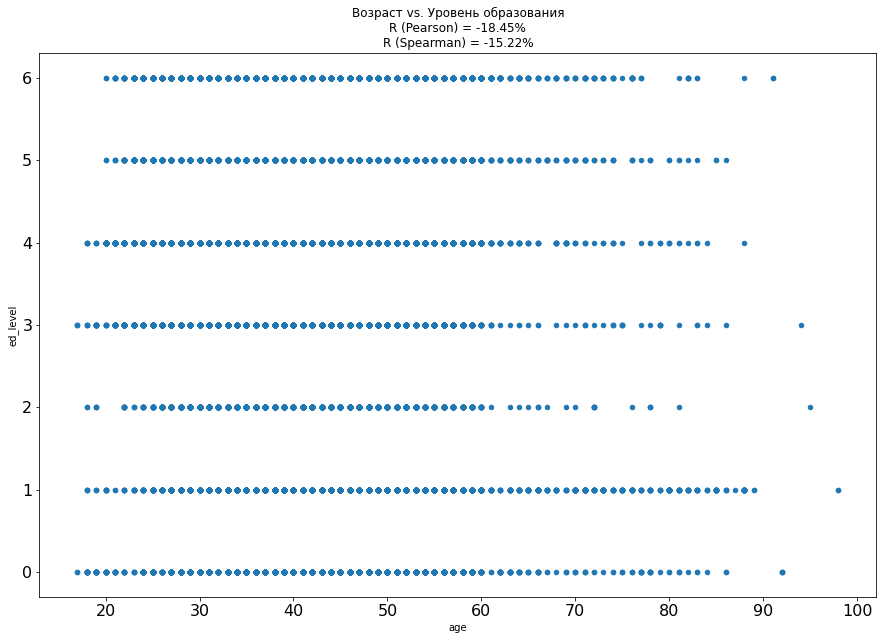

In [45]:
r_pearson = df.age.corr(df.ed_level)
r_spearman = df.age.corr(df.ed_level, method="spearman")
df.plot.scatter(x="age",
                y="ed_level", figsize=(15,10),
                title=f"Возраст vs. Уровень образования\nR (Pearson) = {r_pearson:.2%}\nR (Spearman) = {r_spearman:.2%}",
                fontsize=16);

Интересно, что связь слабая, но обратная.

#### Номер месяца Vs Индекс доверия потребителей

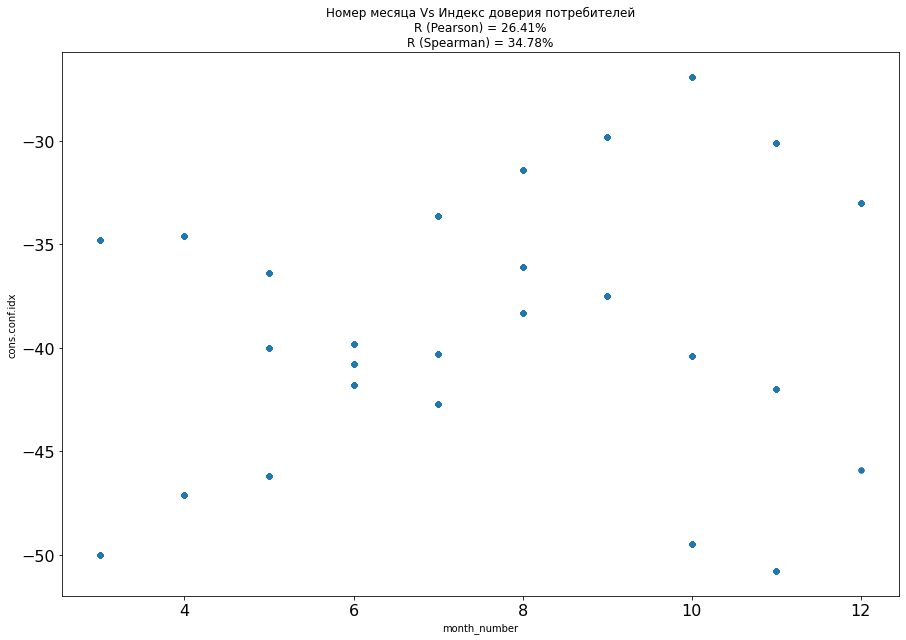

In [46]:
r_pearson = df.month_number.corr(df['cons.conf.idx'])
r_spearman = df.month_number.corr(df['cons.conf.idx'], method="spearman")
df.plot.scatter(x="month_number",
                y="cons.conf.idx", figsize=(15,10),
                title=f"Номер месяца Vs Индекс доверия потребителей\nR (Pearson) = {r_pearson:.2%}\nR (Spearman) = {r_spearman:.2%}",
                fontsize=16);

Связь нелинейная, но есть средняя и, вцелом, прямая.

### Проверка статистических гипотез

#### Непараметрический критерий

Определим зависимы ли распределения категориальных характеристик используя $xi^2$ Пирсона.

##### Образования и наличие ипотечного кредита.
$H_0$ - две категориальные переменные независимы

In [47]:
df_clean = df.dropna(subset=["education","housing"])
cons_table = st.contingency.crosstab(df_clean.education, df_clean.housing)
p_value = st.chi2_contingency(cons_table[1])[1]
alpha = .05
if p_value <= alpha:
    conclusion = "Нулевая гипотеза отклонена"
print(p_value, conclusion)

0.0014842074419170817 Нулевая гипотеза отклонена


То есть эти категориальные переменные зависимы

##### Наличие двух типов кредитов

In [48]:
df_clean = df.dropna(subset=["loan","housing"])
cons_table = st.contingency.crosstab(df_clean.loan, df_clean.housing)
p_value = st.chi2_contingency(cons_table[1])[1]
alpha = .05
if p_value <= alpha:
    conclusion = "Нулевая гипотеза отклонена"
print(p_value, conclusion)

1.4626203966233582e-20 Нулевая гипотеза отклонена


Эти переменные (наличие кредитов) тоже зависимы.

#### Параметрический критерий

Используем t-критерий Стьдента для средних независимых выборок.

$H_0$ - средние равны

$H_1$ - средние **НЕ** равны

##### Средний возраст клиента с ипотекой и без

In [49]:
df_housing = df.query("housing == 1")
df_no_housing = df.query("housing == 0")
results = st.ttest_ind(df_housing.age,
                       df_no_housing.age,
                       equal_var = False)
alpha = .05
print(f'Средний возраст:\nИпотека есть: {df_housing.age.mean()}\tНет ипотеки: {df_no_housing.age.mean()}')
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний возраст:
Ипотека есть: 40.01098697325112	Нет ипотеки: 40.04249261348375
0.7622476296748107
Не получилось отвергнуть нулевую гипотезу


Средние значения выборок равны.

##### Средний возраст, тех кто после кампании сделал вклад и кто нет

In [50]:
df_success = df.query("y == 1")
df_no_success = df.query("y == 0")
results = st.ttest_ind(df_success.age,
                       df_no_success.age,
                       equal_var = False)
alpha = .05
print(f'Средний возраст:\nОформили займ: {df_success.age.mean()}\tНе оформили займ: {df_no_success.age.mean()}')
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний возраст:
Оформили займ: 40.91226557447726	Не оформили займ: 39.91099433451022
1.843009350039163e-06
Отвергаем нулевую гипотезу


В этом случае мы имеем статистически значимую разницу. Эти данные можно использовать для настройки будущих маркетинговых кампаний.

## Машинное обучение

### Подготовка признаков

Для линейных моделей есть довольно жесткие условия и ограничения которые накладываются на признаки. В них не должно быть пропусков, категориальные признаки подлежат кодированию (самое приемлемое кодирование One Hot), количественные нормировке. 

In [51]:
num_features = ['age', "ed_level",
                "month_number", "day_w_n", 'duration', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'euribor3m', 'cons.price.idx',  'cons.conf.idx', 'nr.employed']
df[num_features].isna().sum()

age               0
ed_level          0
month_number      0
day_w_n           0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
euribor3m         0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
dtype: int64

In [52]:
df.isna().sum()

age                 0
job                 0
marital             0
education           0
default             0
housing           990
loan              990
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
ed_level            0
month_number        0
day_w_n             0
new_member          0
dtype: int64

Проблемы в изменённых переменных housing и loan, можем вырезать пропуски - их немного.

In [53]:
df = df.dropna()
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
ed_level          0
month_number      0
day_w_n           0
new_member        0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40186 entries, 0 to 41175
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40186 non-null  int64  
 1   job             40186 non-null  object 
 2   marital         40186 non-null  object 
 3   education       40186 non-null  object 
 4   default         40186 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         40186 non-null  object 
 8   month           40186 non-null  object 
 9   day_of_week     40186 non-null  object 
 10  duration        40186 non-null  int64  
 11  campaign        40186 non-null  int64  
 12  pdays           40186 non-null  int64  
 13  previous        40186 non-null  int64  
 14  poutcome        40186 non-null  object 
 15  emp.var.rate    40186 non-null  float64
 16  cons.price.idx  40186 non-null  float64
 17  cons.conf.idx   40186 non-null 

In [55]:
df_new = df[num_features]
df_new.head()

,age,ed_level,month_number,day_w_n,duration,campaign,pdays,previous,emp.var.rate,euribor3m,cons.price.idx,cons.conf.idx,nr.employed
0,56,1,5,1,261,1,999,0,1.1,4.857,93.994,-36.4,5191.0
1,57,4,5,1,149,1,999,0,1.1,4.857,93.994,-36.4,5191.0
2,37,4,5,1,226,1,999,0,1.1,4.857,93.994,-36.4,5191.0
3,40,2,5,1,151,1,999,0,1.1,4.857,93.994,-36.4,5191.0
4,56,4,5,1,307,1,999,0,1.1,4.857,93.994,-36.4,5191.0


In [56]:
bin_features = ['loan', 'housing', 'new_member', 'y']
df_new = df_new.join(df[bin_features])
df_new.head()

,age,ed_level,month_number,day_w_n,duration,campaign,pdays,previous,emp.var.rate,euribor3m,cons.price.idx,cons.conf.idx,nr.employed,loan,housing,new_member,y
0,56,1,5,1,261,1,999,0,1.1,4.857,93.994,-36.4,5191.0,0,0,1,0
1,57,4,5,1,149,1,999,0,1.1,4.857,93.994,-36.4,5191.0,0,0,1,0
2,37,4,5,1,226,1,999,0,1.1,4.857,93.994,-36.4,5191.0,0,1,1,0
3,40,2,5,1,151,1,999,0,1.1,4.857,93.994,-36.4,5191.0,0,0,1,0
4,56,4,5,1,307,1,999,0,1.1,4.857,93.994,-36.4,5191.0,1,0,1,0


In [57]:
cat_features = ['job', 'marital', 'default', 'contact']
df_cat = pd.get_dummies(df[cat_features], drop_first=True)
df_cat.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,contact_telephone
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [58]:
df_new = df_new.join(df_cat)

### Деление набора и шкалирование

In [59]:
data_train, data_test = train_test_split(df_new, random_state=12345, test_size=0.25)

In [60]:
data_train.shape

(30139, 34)

In [61]:
data_test.shape

(10047, 34)

### Логистическая регрессия

Будем предсказывать тот же параметр что и в задаче с kaggle y - открыл ли клиент депозит. Делмм на предикторы и отклик.

In [62]:
y_test = data_test["y"]
X_test = data_test.drop(['y', 'duration'], axis=1)
y_train = data_train["y"]
X_train = data_train.drop(['y', 'duration'], axis=1)

Для подбора параметра регуляризации и кроос-валидации используем классы Pipline и GridSearchCV.

In [63]:
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(class_weight="balanced", random_state=12345))])

balanced говорит о противодействии дисбалансу классов. Кроме того, необходимо использовать f1 меру вместо accurancy.

In [65]:
f1 = make_scorer(f1_score)

In [66]:
par = {"logreg__C":np.logspace(-5,5, 20)}
gcv = GridSearchCV(pipe, par, verbose=3, scoring=f1)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...................logreg__C=1e-05;, score=0.386 total time=   0.2s
[CV 2/5] END ...................logreg__C=1e-05;, score=0.360 total time=   0.2s
[CV 3/5] END ...................logreg__C=1e-05;, score=0.357 total time=   0.2s
[CV 4/5] END ...................logreg__C=1e-05;, score=0.371 total time=   0.2s
[CV 5/5] END ...................logreg__C=1e-05;, score=0.376 total time=   0.2s
[CV 1/5] END ...logreg__C=3.359818286283781e-05;, score=0.386 total time=   0.2s
[CV 2/5] END ...logreg__C=3.359818286283781e-05;, score=0.359 total time=   0.2s
[CV 3/5] END ...logreg__C=3.359818286283781e-05;, score=0.355 total time=   0.2s
[CV 4/5] END ...logreg__C=3.359818286283781e-05;, score=0.369 total time=   0.2s
[CV 5/5] END ...logreg__C=3.359818286283781e-05;, score=0.373 total time=   0.2s
[CV 1/5] END ..logreg__C=0.00011288378916846884;, score=0.387 total time=   0.2s
[CV 2/5] END ..logreg__C=0.00011288378916846884

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=12345))]),
             param_grid={'logreg__C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])},
             scoring=make_scorer(f1_score), verbose=3)

In [67]:
print(f"Лучший f1-score: {gcv.best_score_}, при C= {gcv.best_params_['logreg__C']}")

Лучший f1-score: 0.4119695074379034, при C= 233.57214690901213


Протестируем модель на тестовом наборе.

In [68]:
pred_y = gcv.best_estimator_.predict(X_test)
print("f1=", f1_score(y_test, pred_y))

f1= 0.41574624752194844


f1 не очень высокое зато переобучения тоже нет. Здесь возможно стоило бы попробовать в будущем модели основанные на деревьях.

In [69]:
print('ROC_AUC=', roc_auc_score(y_test, pred_y))

ROC_AUC= 0.7393172726811983


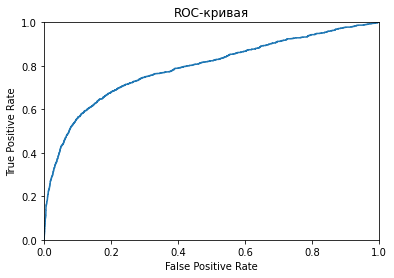

In [70]:
def roc_plot(target_valid, features_valid, model):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.plot(fpr, tpr, linestyle='-')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title("ROC-кривая")
roc_plot(y_test, X_test, gcv.best_estimator_)

Модель вполне адекватна.

### Линейная регрессия

За неимением лучшего будем предсказывать возраст клиента.

In [71]:
y_test = data_test["age"]
X_test = data_test.drop(['age'], axis=1)
y_train = data_train["age"]
X_train = data_train.drop(['age'], axis=1)

У линейной регрессии нет гиперпараметра. Будем обучать на тренировочном, а потом проверять на тестовом, не забывая про нормировку.

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"R2 тренировочного = {lr.score(X_train, y_train)}")

R2 тренировочного = 0.3902249496235316


In [73]:
X_test = scaler.transform(X_test)
pred_y = lr.predict(X_test)
r2_score(y_test, pred_y)

0.4110651512874025

Переобучения нет показатели не очень хорошие, возможно из-за мультиколинеарности.